## **3. Lung Function in 1 to 10 Year Old Children (1.5 điểm)**
- Tạo tập tin: question_3.ipynb (toàn bộ code của câu 3 sẽ được viết trong file này)
- Cho dữ liệu children_lung.csv. Bộ dữ liệu có 654 trẻ em từ 1 đến 10 tuổi. Với output y là
FEV (forced exhalation volume), thước đo lượng không khí mà ai đó có thể buộc phải
thở ra từ phổi của họ và inputs X là một hoặc nhiều thuộc tính còn lại (Nguồn dữ liệu: Dữ
liệu này là một phần của bộ dữ liệu được đưa ra trong Kahn, Michael (2005). "An Exhalent
Problem for Teaching Statistics", The Journal of Statistical Education, 13".
- Yêu cầu: Sử dụng Linenear Regression để thực hiện việc dự đoán FEV dựa trên các
thuộc tính age/ age và ht.
- Gợi ý các bước thực hiện:
1. Đọc dữ liệu và gán cho biến data.
2. Xem thông tin data: head(), số dòng, số cột, summary...
3. Tiền xử lý dữ liệu (nếu cần).
4. Vẽ biểu đồ quan sát mối liên hệ giữa FEV và age. Quan sát và nhận xét. Có vấn đề gì
đặc biệt từ dữ liệu không? Nếu có thì đó là vấn đề gì?
5. Chia dữ liệu data thành 2 bộ dữ liệu data_FEV_less_10 (chứa các mẫu có FEV <10)
và data_FEV_more_10 (chứa các mẫu có FEV >=10)
6. Với data_FEV_more_10:
a. Thực hiện Simple Linear Regression để dự đoán FEV từ age. Xây dựng
model. Đánh giá model.
b. Cho age lần lượt là: [2, 3, 4, 5]. Hãy cho biết FEV lần lượt là bao nhiêu?
c. Trực quan hóa kết quả.
7. Với data_FEV_less_10:
    - a. Thực hiện Multiple Linear Regression để dự đoán FEV từ age và ht.
    - b. Cho age và ht lần lượt là: age = [5, 6, 7, 8, 9], ht = [49.5, 55, 57, 60, 62] .
Hãy cho biết FEV lần lượt là bao nhiêu?
    - c. Trực quan hóa kết quả.

In [ ]:
# https://drive.google.com/file/d/1BBxxA223GOH5x4QDU14UxDUbxHG-cwTA/view?usp=sharing
system('gdown --id 1BBxxA223GOH5x4QDU14UxDUbxHG-cwTA')

In [ ]:
install.packages('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('BMA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('e1071')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('moments')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(data.table)
library(dplyr)
library(purrr)
library(ggplot2)
library(BMA)
library(e1071)
library(moments)
library(gridExtra)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:survival’:

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown

In [ ]:
# 1. Đọc dữ liệu và gán cho biến data.
data = read.csv('children_lung.csv')

In [ ]:
# 2. Xem thông tin data: head(), số dòng, số cột, summary...

In [ ]:
print(paste('number of rows: ', dim(data)[1]))
print(paste('number of columns: ', dim(data)[2]))

[1] "number of rows:  654"
[1] "number of columns:  5"


In [ ]:
head(data)
tail(data)
summary(data)
str(data)

,age,FEV,ht,sex,smoke
,<dbl>,<dbl>,<dbl>,<int>,<int>
1,9,1.708,57.0,0,0
2,8,1.724,67.5,0,0
3,7,1.720,54.5,0,0
4,9,1.558,53.0,1,0
5,9,1.895,57.0,1,0
6,8,2.336,61.0,0,0


,age,FEV,ht,sex,smoke
,<dbl>,<dbl>,<dbl>,<int>,<int>
649,4.872,72.0,NA,NA,NA
650,4.270,67.0,NA,NA,NA
651,3.727,68.0,NA,NA,NA
652,2.853,60.0,NA,NA,NA
653,2.795,63.0,NA,NA,NA
654,3.211,66.5,NA,NA,NA


      age             FEV               ht             sex        
 Min.   :1.458   Min.   : 0.791   Min.   :46.00   Min.   :0.0000  
 1st Qu.:3.049   1st Qu.: 2.041   1st Qu.:53.50   1st Qu.:0.0000  
 Median :4.330   Median :59.000   Median :57.00   Median :0.0000  
 Mean   :5.205   Mean   :35.210   Mean   :56.92   Mean   :0.4984  
 3rd Qu.:8.000   3rd Qu.:65.000   3rd Qu.:60.00   3rd Qu.:1.0000  
 Max.   :9.000   Max.   :74.000   Max.   :69.00   Max.   :1.0000  
                                  NA's   :345     NA's   :345     
     smoke       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.0032  
 3rd Qu.:0.0000  
 Max.   :1.0000  
 NA's   :345     

'data.frame':	654 obs. of  5 variables:
 $ age  : num  9 8 7 9 9 8 6 6 8 9 ...
 $ FEV  : num  1.71 1.72 1.72 1.56 1.9 ...
 $ ht   : num  57 67.5 54.5 53 57 61 58 56 58.5 60 ...
 $ sex  : int  0 0 0 1 1 0 0 0 0 0 ...
 $ smoke: int  0 0 0 0 0 0 0 0 0 0 ...


ta sẽ sử dụng Linenear Regression để thực hiện việc dự đoán FEV dựa trên các thuộc tính age và ht.
- input (predict): age và ht
- output (target): FEV
- age, ht, FEV đều là continuous variable


In [ ]:
df = select(data, age, ht, FEV)
head(df)

,age,ht,FEV
,<dbl>,<dbl>,<dbl>
1,9,57.0,1.708
2,8,67.5,1.724
3,7,54.5,1.720
4,9,53.0,1.558
5,9,57.0,1.895
6,8,61.0,2.336


In [ ]:
continuous_variables_analysis = function(dataset){
    # summarise_all(dataset, ~ sum(is.na(.)))
    count_missing = sapply(dataset, function(y) sum(length(which(is.na(y)))))
    df_count_missing = arrange(filter(data.frame(count_missing), count_missing > 0), desc(count_missing))
    df_count_missing$missing_percents = round(df_count_missing$count_missing / dim(df)[1], 4) * 100
    print(df_count_missing)

    len = length(dataset)
    par(mfrow=c(1, len))
    for (i in 1:len){
        boxplot(dataset[i], main=names(dataset[i])) 
    }

    for (i in 1:len){
        outliers_feature = boxplot.stats(unlist(dataset[i]))$out
        if (length(outliers_feature) > 0)
            print(paste(names(dataset[i]), 'có', length(outliers_feature), 'là: ', outliers_feature))
        else
            print(paste(names(dataset[i]), 'có', length(outliers_feature), 'outliers'))
    }
}

   count_missing missing_percents
ht           345            52.75
[1] "age có 0 outliers"
[1] "ht có 0 outliers"
[1] "FEV có 0 outliers"


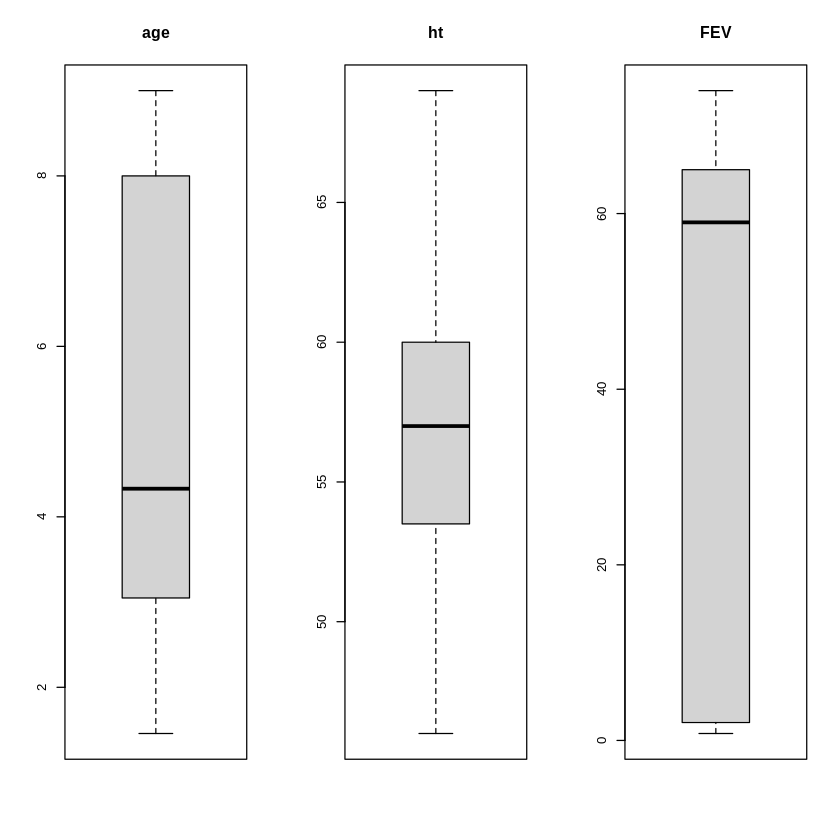

In [ ]:
continuous_variables_analysis(df)

<font color = 'red'>**Nhận xét:**</font>
- Từ kết quả trên, ta thấy ht có 345 giá trị null
- Các features đều ko có outlier
=> thay thế các giá trị null của ht = mean(ht)

In [ ]:
df$ht[is.na(df$ht)] = mean(df$ht, na.rm = TRUE)

In [ ]:
length(df$ht[is.na(df$ht)])

[1] 0

In [ ]:
continuous_variables_detailed_analysis = function(dataset, f){
    print(summary(f))
    # print(paste('median = ', median(f)))
    print(paste('var = ', var(f)))

    skew = skewness(f)
    kur = kurtosis(f)
    print(paste("Skew: ", skew))

    if (skew > 0)
        print("Phân phối lệch phải")
    else if (skew == 0)
        print("Phân phối đối xứng")
    else
        print("Phân phối lệch trái")

    print(paste("Kurtosis: ", kur))
    if (kur > 0)
        print("Phân phối nhọn hơn pp chuẩn")
    else if (kur == 0)
        print("Phân phối đối xứng")
    else
        print("Phân phối bẹt hơn pp chuẩn")

    p1 = hist(f, col = "#f7a34c", main = names(f)) 
    p1

    p = ggplot(dataset, aes(f))
    p2 = p + geom_histogram(aes(y=..density..), bins = 10, color = "white", fill = '#1e81b0') +
    ggtitle(names(f)) + theme_bw(base_size = 12) + geom_density(col='red')
    p2
}

[1] "age"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.458   3.049   4.330   5.205   8.000   9.000 
[1] "var =  5.90157180733711"
[1] "Skew:  0.354346017871129"
[1] "Phân phối lệch phải"
[1] "Kurtosis:  1.5653070447806"
[1] "Phân phối nhọn hơn pp chuẩn"


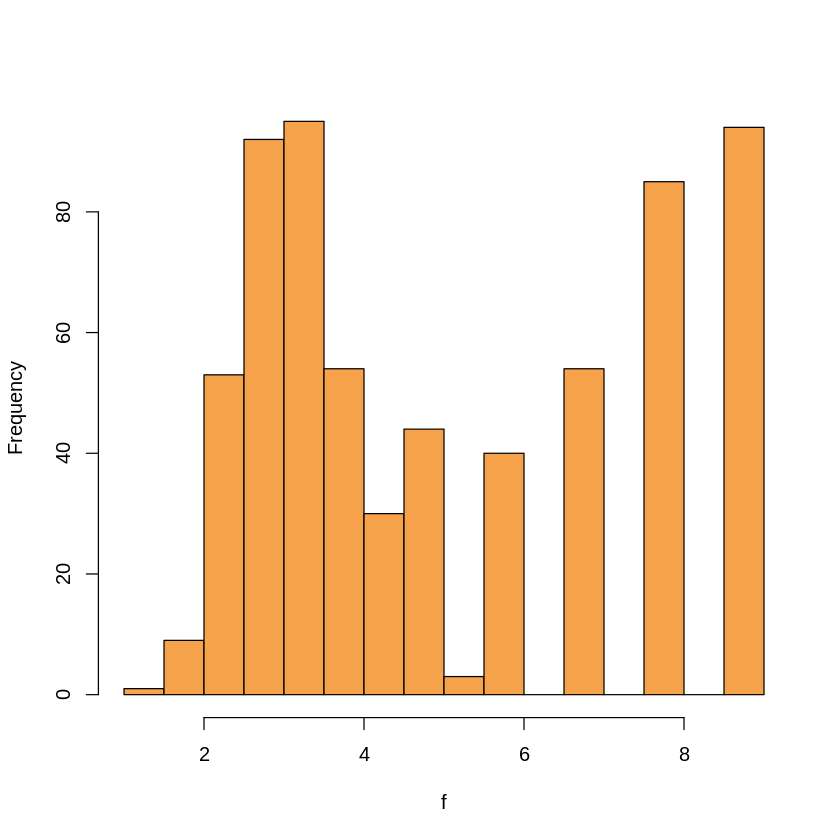

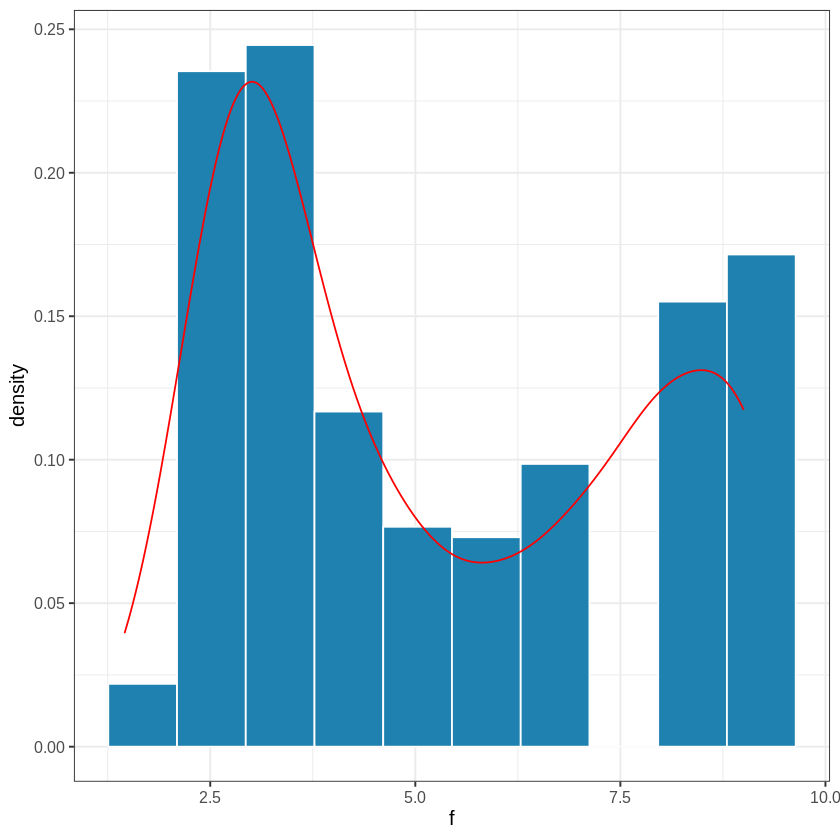

In [ ]:
print('age')
continuous_variables_detailed_analysis(df, df$age)

[1] "FEV"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.791   2.041  59.000  35.210  65.000  74.000 
[1] "var =  994.852509807234"
[1] "Skew:  -0.0883730788489787"
[1] "Phân phối lệch trái"
[1] "Kurtosis:  1.03779677485636"
[1] "Phân phối nhọn hơn pp chuẩn"


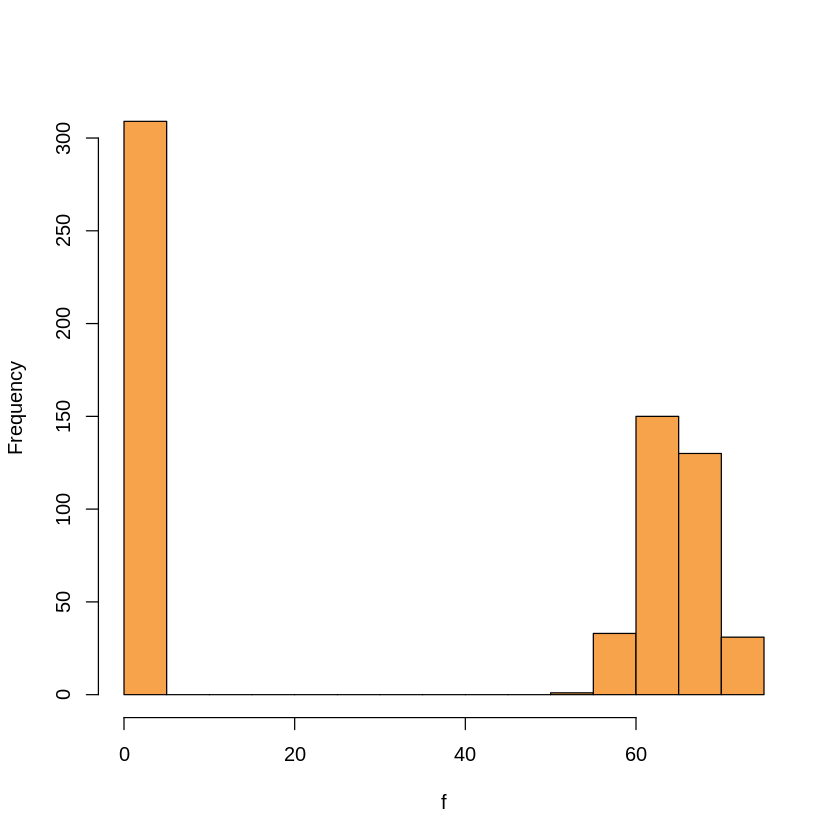

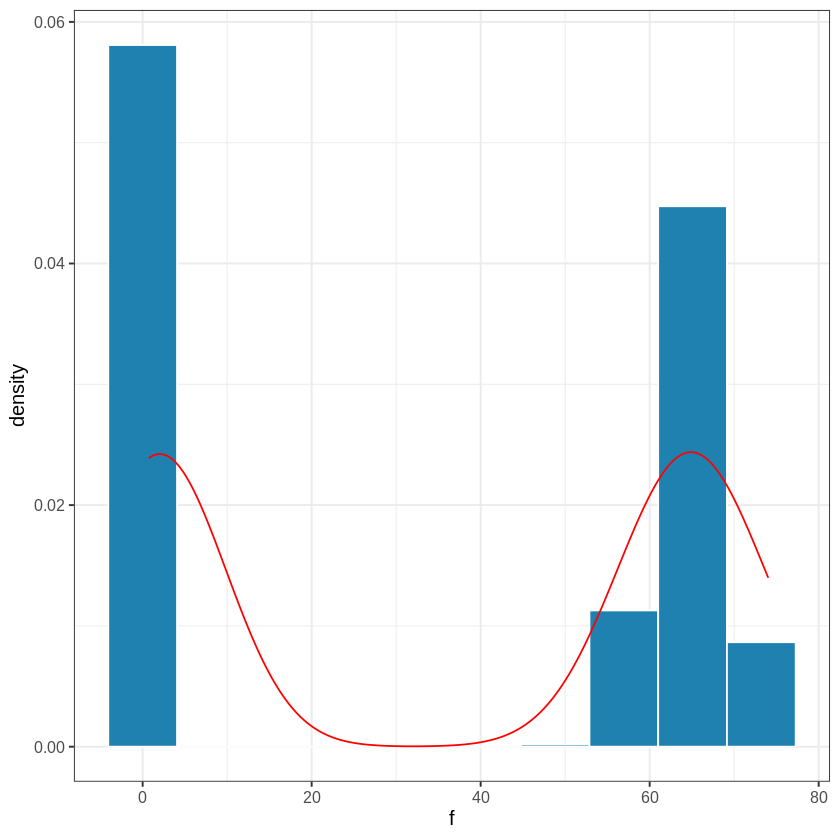

In [ ]:
print('FEV')
continuous_variables_detailed_analysis(df, df$FEV)

[1] "ht"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.00   56.92   56.92   56.92   57.00   69.00 
[1] "var =  9.16636435272603"
[1] "Skew:  -0.0602291059762284"
[1] "Phân phối lệch trái"
[1] "Kurtosis:  5.40208439109513"
[1] "Phân phối nhọn hơn pp chuẩn"


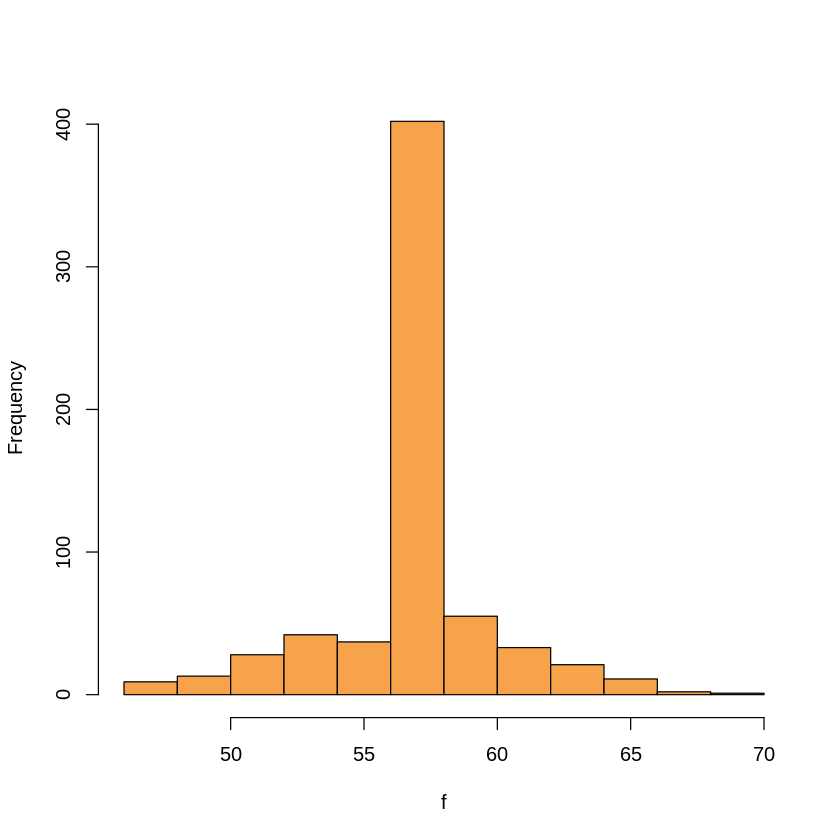

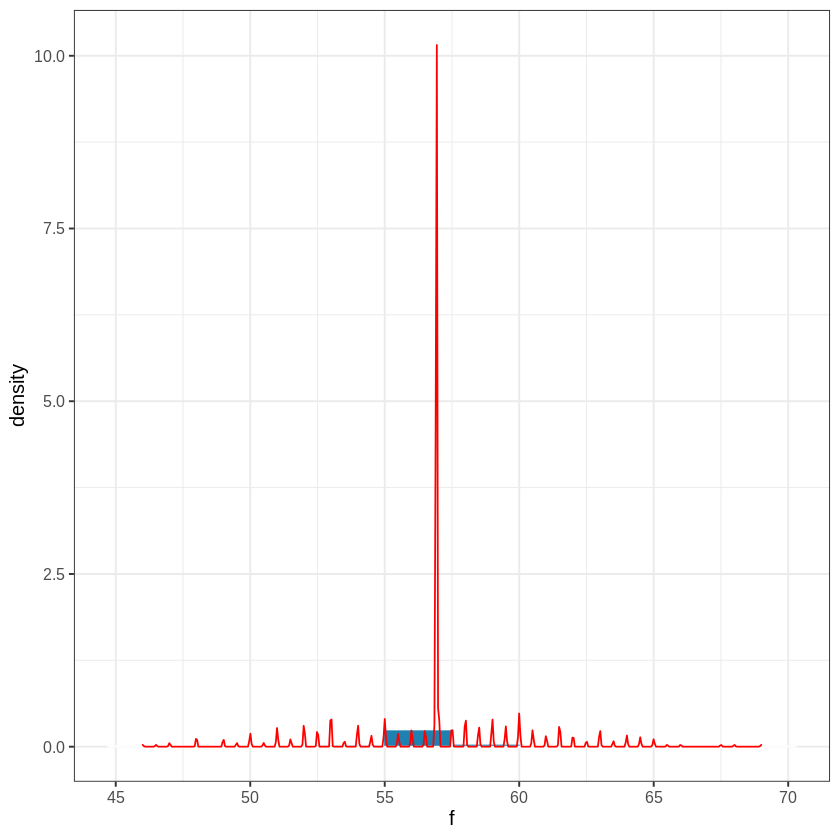

In [ ]:
print('ht')
continuous_variables_detailed_analysis(df, df$ht)

In [ ]:
# 4. Vẽ biểu đồ quan sát mối liên hệ giữa FEV và age. Quan sát và nhận xét. Có vấn đề gì đặc biệt từ dữ liệu không? Nếu có thì đó là vấn đề gì?

[1] -0.8614907


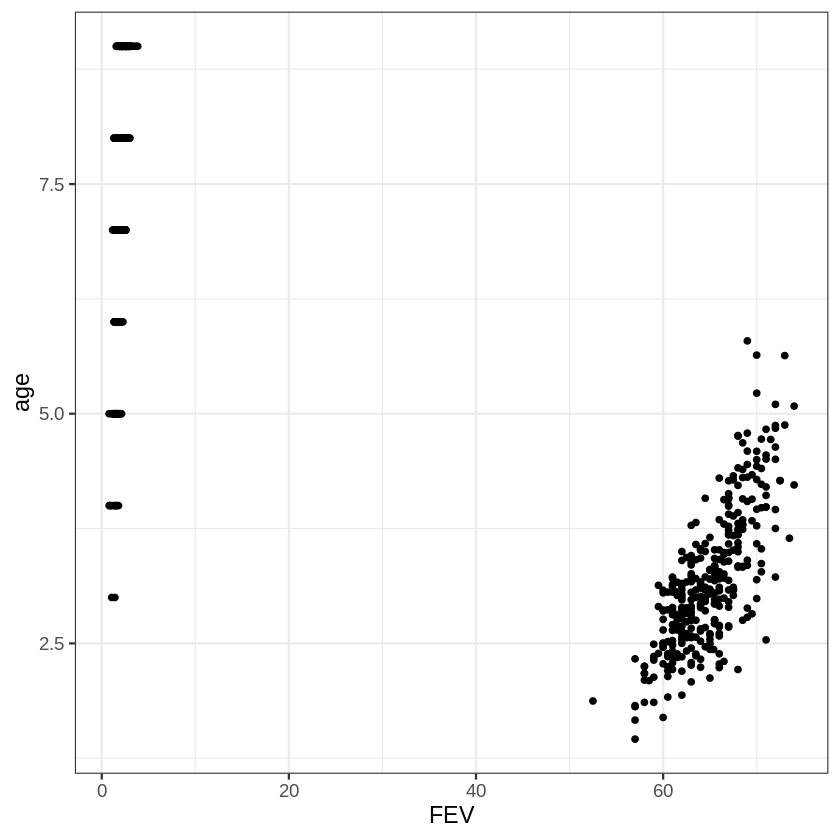

In [ ]:
plot <- ggplot(data = df, aes(x = FEV, y = age)) +
        geom_point() +
        theme_bw(base_size = 14)
plot

print(cor(df$FEV, df$age))

với cor = -0.8614907, ta thấy FEV và age tương quan nghịch

[1] 0.009132441


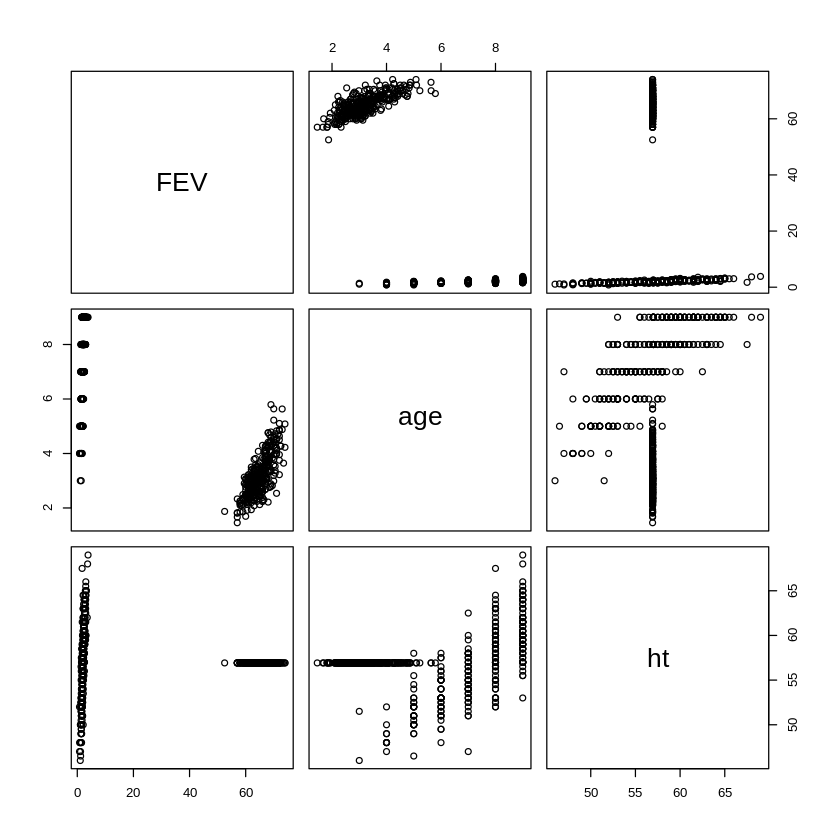

In [ ]:
pairs(~FEV + age + ht, data = df)
print(cor(df$FEV, df$ht))

ta thấy FEV và age tương quan nghịch và FEV không có tương quan với ht

In [ ]:
# 5. Chia dữ liệu data thành 2 bộ dữ liệu data_FEV_less_10 (chứa các mẫu có FEV <10) và data_FEV_more_10 (chứa các mẫu có FEV >=10)

In [ ]:
data_FEV_less_10 = filter(df, FEV < 10)
data_FEV_more_10 = filter(df, FEV >= 10)

### Với data_FEV_more_10:
- a. Thực hiện Simple Linear Regression để dự đoán FEV từ age. Xây dựng
model. Đánh giá model.
- b. Cho age lần lượt là: [2, 3, 4, 5]. Hãy cho biết FEV lần lượt là bao nhiêu?
- c. Trực quan hóa kết quả.

In [ ]:
# tao train/test
set.seed(42)
trainingRowIndex <- sample(1:nrow(data_FEV_more_10), 0.75*nrow(data_FEV_more_10))
trainingRowIndex

[1]  49 321 153  74 228 146 122 345 128 303  24 327  89 165 110  20 297 333
 [19] 283 109   5 212 259 314 298 335 158 299 322 136 292 340 326 197   4 226
 [37] 215 245 114 262 130   3 258 186 138  40 325  33 103 341 313 157  76 265
 [55]  35 221  16 220 248 118 305  82 331 149  57 100  91 269 181  54 208 246
 [73]  60 108 126 112  72   1 141 206  42 315 287 251 294  25 191  32 238  14
 [91] 111   6 263 175  43 190 332 275 113 274 247 242  31 162  94 224 254 214
[109]  38  95 239  84  15  34 170 309 188  12 337 154  41 193  66  56 152  98
[127] 260  92 107  61 250 256 244 124 194 236 336 155 301 185  28 286  37 207
[145] 308 318 291  78 257 156 339  97 182 127 243 306 180  81 187  27  30 189
[163] 280  75 145  62  13 271 324  63 338 216 116 268 277 161 205   2 159 316
[181] 192 304 179 296 319  51 210  47 222 144  10 343 164 284 169  93 281 234
[199] 204 174 102 276  55 196  58 230  85 171 252  18 143  36  71 201 302 241
[217]  86 330 307 195 225  11 218 237 106  73  23  90 115 105 177  19 123 139
[235] 134 264 129 328 142  59 266 121 270  21  70 231 342  88 135   7 312 213
[253]  53 160 253 272 203 223

In [ ]:
#train data
trainData <- data_FEV_more_10[trainingRowIndex, ]
nrow(trainData)

#test
testData <- data_FEV_more_10[-trainingRowIndex, ]
nrow(testData)

[1] 258

[1] 87

In [ ]:
# trainData_scaled = scale(trainData)
# testData_scaled = scale(testData, center=attr(trainData_scaled, "scaled:center"), 
#                               scale=attr(trainData_scaled, "scaled:scale"))

In [ ]:
lmMod <- lm(FEV ~ age, data = trainData)
ipred <- predict(lmMod, testData)

In [ ]:
mse <- mean(lmMod$residuals^2)
mse
mse_test <- mean((testData$FEV - ipred)^2)
mse_test

[1] 6.104106

[1] 5.290888

In [ ]:
# giá trị của MSE nhỏ => model khá okk

In [ ]:
summary(lmMod)


Call:
lm(formula = FEV ~ age, data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6113 -1.6496 -0.1272  1.3900  8.3724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  53.0241     0.6662   79.60   <2e-16 ***
age           3.7839     0.2014   18.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.48 on 256 degrees of freedom
Multiple R-squared:  0.5796,	Adjusted R-squared:  0.578 
F-statistic:   353 on 1 and 256 DF,  p-value: < 2.2e-16


với R-square = 0.5796, dù model không có score cao nhưng vẫn thể hiện được sự quan trọng của age trong việc dự đoán FEV (3* lận ạ)

Từ số liệu trên, ta có thể viết được model: Y = 53.0241 + 3.7839 * age

In [ ]:
b = coef(lmMod)[1]
age = coef(lmMod)[2]
b
age

(Intercept) 
   53.02408

age 
3.783901

In [ ]:
# Y = 53.0241 + 3.7839 * age

In [ ]:
# Cho age lần lượt là: [2, 3, 4, 5]. Hãy cho biết FEV lần lượt là bao nhiêu?
x = c(2,3,4,5)
y = predict(lmMod, data.frame(age = x))
print(y)


       1        2        3        4 
60.59189 64.37579 68.15969 71.94359 


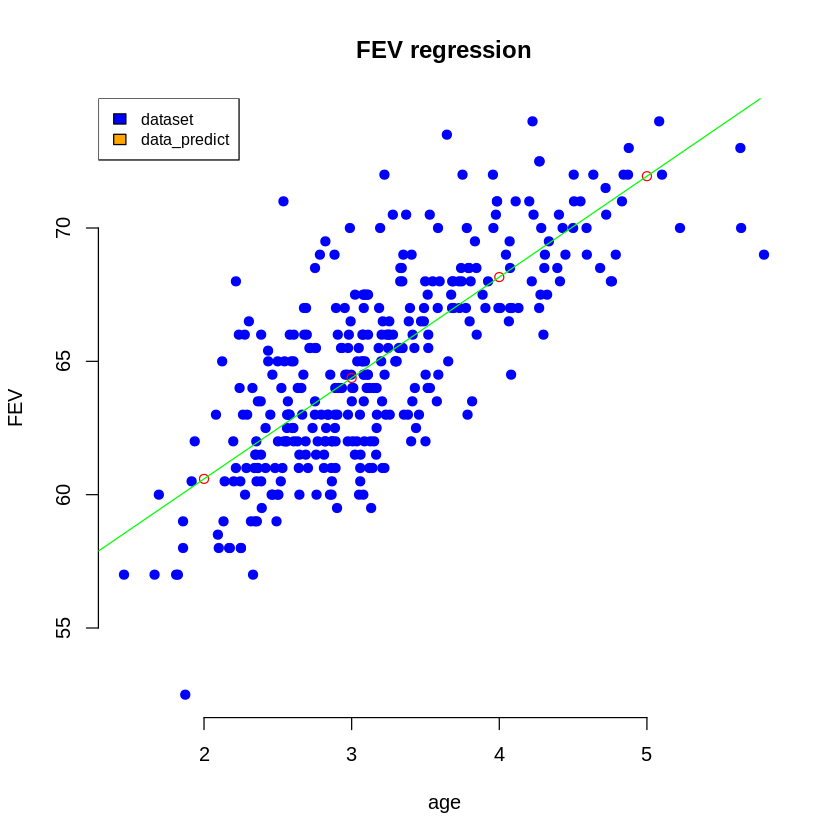

In [ ]:
# visualization
plot(data_FEV_more_10$age, data_FEV_more_10$FEV, 
    main = "FEV regression",
    xlab = "age", ylab = "FEV",
    pch = 19, frame = FALSE, col= 'blue')

lines(x, y, col= 'red', type='p')

abline(lmMod, data_FEV_more_10, col = "green")
legend("topleft", c("dataset", "data_predict"), 
        cex=0.8, fill = c("blue", "orange"))


Nhìn chung thì cũng khá ổn

7. Với data_FEV_less_10:
- a. Thực hiện Multiple Linear Regression để dự đoán FEV từ age và ht.
- b. Cho age và ht lần lượt là: age = [5, 6, 7, 8, 9], ht = [49.5, 55, 57, 60, 62] .
Hãy cho biết FEV lần lượt là bao nhiêu?
- c. Trực quan hóa kết quả.

In [ ]:
set.seed(42) # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(data_FEV_less_10), 0.75*nrow(data_FEV_less_10)) 

In [ ]:
trainingData <- data_FEV_less_10[trainingRowIndex, ] # training data
testData <- data_FEV_less_10[-trainingRowIndex, ] # test data

In [ ]:
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Rows of training data and test data:"
[1] 231
[1] 78


In [ ]:
lmMod <- lm(FEV~age+ht, data = trainingData)

In [ ]:
cPred <- predict(lmMod, testData) # predict Petrol Consumption

# mean square error according to model
mse <- mean(lmMod$residuals^2)
print(paste("mse: ", mse))

# mean square error of testData
mse_test = mean((testData$FEV - cPred)^2)
print(paste("mse in test: ", mse_test))

[1] "mse:  0.0865641422501535"
[1] "mse in test:  0.0822538493270682"


mse thấp (nhỏ hơn của simple linear model) => ổn nè

In [ ]:
# Show the model.
print(summary(lmMod))


Call:
lm(formula = FEV ~ age + ht, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26435 -0.17742  0.00011  0.17801  1.02991 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.247913   0.292567 -11.101   <2e-16 ***
age          0.027775   0.021605   1.286      0.2    
ht           0.089097   0.006962  12.797   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2961 on 228 degrees of freedom
Multiple R-squared:  0.6713,	Adjusted R-squared:  0.6684 
F-statistic: 232.8 on 2 and 228 DF,  p-value: < 2.2e-16



R-squre tăng khoảng 0.1 so với simple model, tuy nhiên age cho ra kết quả ko tốt (ko có * nào)
- ta có thể viết dc model: Y = -3.247913 + 0.027775*age + 0.089097*ht

In [ ]:
b = coef(lmMod)[1]
age = coef(lmMod)[2]
ht = coef(lmMod)[3]

b
age
ht

(Intercept) 
  -3.247913

age 
0.02777505

ht 
0.08909716

In [ ]:
# Y = -3.247913 + 0.027775age + 0.089097ht

In [ ]:
#Cho age và ht lần lượt là: age = [5, 6, 7, 8, 9], ht = [49.5, 55, 57, 60, 62] => FEV = ?
x1 = c(5, 6, 7, 8, 9)
x2 = c(49.5, 55, 57, 60, 62)

y = predict(lmMod, data.frame(age=x1, ht=x2))
y

1        2        3        4        5 
1.301272 1.819081 2.025051 2.320117 2.526087

Warning message in abline(lmMod, data_FEV_less_10, col = "green"):
“only using the first two of 3 regression coefficients”


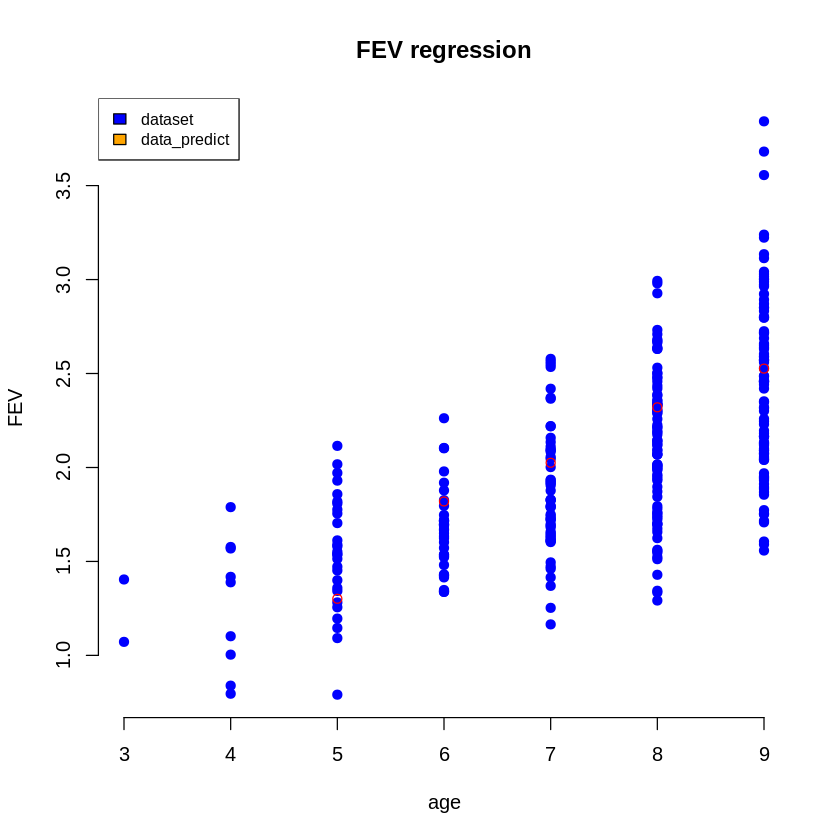

In [ ]:
# visualization
plot(data_FEV_less_10$age, data_FEV_less_10$FEV, 
    main = "FEV regression",
    xlab = "age", ylab = "FEV",
    pch = 19, frame = FALSE, col= 'blue')

lines(x1, y, col= 'red', type='p')

abline(lmMod, data_FEV_less_10, col = "green")
legend("topleft", c("dataset", "data_predict"), 
        cex=0.8, fill = c("blue", "orange"))

Warning message in abline(lmMod, data_FEV_less_10, col = "green"):
“only using the first two of 3 regression coefficients”


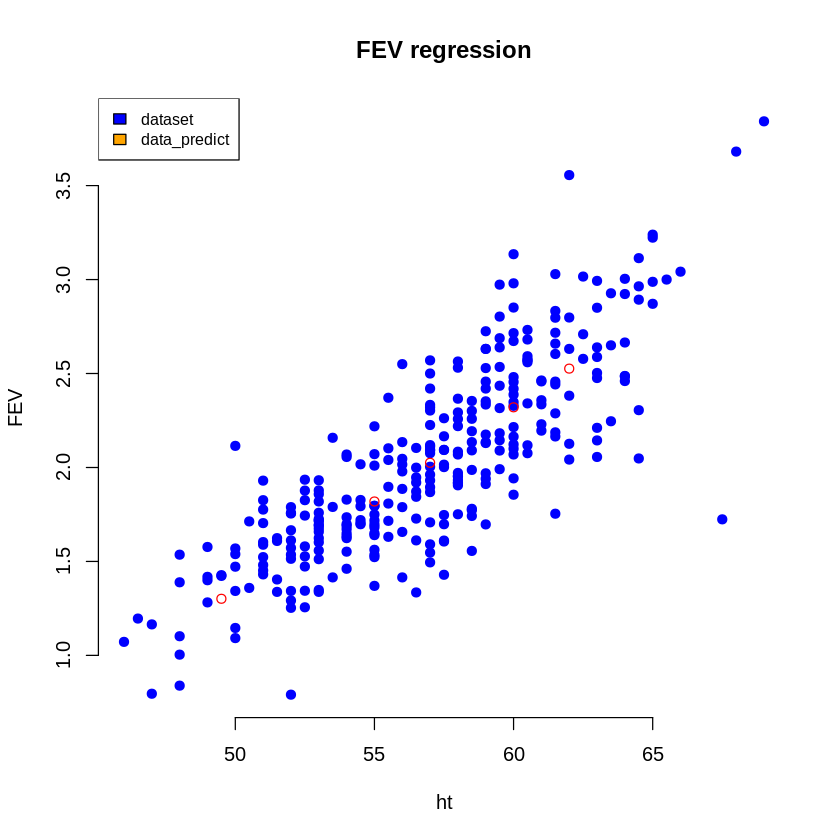

In [ ]:
# visualization
plot(data_FEV_less_10$ht, data_FEV_less_10$FEV, 
    main = "FEV regression",
    xlab = "ht", ylab = "FEV",
    pch = 19, frame = FALSE, col= 'blue')

lines(x2, y, col= 'red', type='p')

abline(lmMod, data_FEV_less_10, col = "green")
legend("topleft", c("dataset", "data_predict"), 
        cex=0.8, fill = c("blue", "orange"))